# Manipulación de datos con Pandas
---

La exploración y preprocesamiento de los data set es probablemente el paso más importante para construir modelos eficientes de Machine Learning. Los datos crudos contienen ruido, valores faltantes, representación inconsistente de características, y muchos otros problemas. Para lograr un modelo preciso que ayude a resolver el problema deseado y realice pronósticos de alta precisión, será necesario manipular estos datos sin procesar.

En esta libreta veremos algunos comandos básicos para manipular datos crudos en Colab haciendo uso de la librería Pandas.

Esta información fue tomada de [DataCamp Data, Manipulation with pandas](https://learn.datacamp.com/courses/data-manipulation-with-pandas).

## Importando librerías necesarias
---

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Quita el limite de la cantidad de columnas mostradas
pd.set_option('display.max_columns', None)

# Revierte la configuración anterior
# pd.reset_option('display.max_columns')

`homelessness` es un DataFrame que contiene estimaciones de la falta de vivienda en cada estado de EE. UU. en 2018. La columna `individual` es el número de personas sin hogar que no forman parte de una familia con niños. La columna `family_members` es el número de personas sin hogar que forman parte de una familia con niños. La columna `state_pop` es la población total del estado.

## Carga de archivo en Colab
---

En la sección `Files` de la izquierda (icono con imagen de un folder) deberán cargarse los archivos necesarios dando click derecho en la carpeta `sample_data`, opción `Upload` para que los datos puedan ser leídos correctamente.

>***NOTA:*** con este método los archivos sólo se cargan temporalmente mientras tengamos activa la sesión. Una vez termine, si volvemos a abrir el notebook, los arcivos deben ser cargados nuevamente.

Para obtener la ruta del archivo basta con dar click derecho sobre el y seleccionar la opción `Copy path`.

In [168]:
homelessness = pd.read_csv('/content/sample_data/homelessness.csv')

## Inspeccionando el DataFrame
---

`.head()` devuelve las primeras filas (la "cabeza" del DataFrame).

`.info()` muestra información sobre cada una de las columnas, como el tipo de datos y el número de valores no nulos.

`.shape` devuelve el número de filas y columnas del DataFrame.

`.describe()` calcula algunas estadísticas de resumen para cada columna.

In [169]:
# vista previa de las primeras filas del DataFrame
print(homelessness.head())

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama         2570             864    4887681
1             Pacific      Alaska         1434             582     735139
2            Mountain     Arizona         7259            2606    7158024
3  West South Central    Arkansas         2280             432    3009733
4             Pacific  California       109008           20964   39461588


In [170]:
# nombres de las columnas, tipos de datos y valores no nulos
print(homelessness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          51 non-null     object
 1   state           51 non-null     object
 2   individuals     51 non-null     int64 
 3   family_members  51 non-null     int64 
 4   state_pop       51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


In [171]:
# tupla con el numero de filas y columnas del df.
print(homelessness.shape)

(51, 5)


In [172]:
# muestra algunos estadísticos de resumen
print(homelessness.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


## Partes de un DataFrame
---

Los DataFrame constan de tres componentes diferentes accesibles mediante atributos (valores, columnas e índices).

`.values` una matriz bidimensional de NumPy de valores.

`.columns` los nombres de las columnas.

`.index` los números o nombres de las filas.

In [173]:
# Contiene los valores de los datos en un arreglo de dos dimensiones de NumPy.
print(homelessness.values)

[['East South Central' 'Alabama' 2570 864 4887681]
 ['Pacific' 'Alaska' 1434 582 735139]
 ['Mountain' 'Arizona' 7259 2606 7158024]
 ['West South Central' 'Arkansas' 2280 432 3009733]
 ['Pacific' 'California' 109008 20964 39461588]
 ['Mountain' 'Colorado' 7607 3250 5691287]
 ['New England' 'Connecticut' 2280 1696 3571520]
 ['South Atlantic' 'Delaware' 708 374 965479]
 ['South Atlantic' 'District of Columbia' 3770 3134 701547]
 ['South Atlantic' 'Florida' 21443 9587 21244317]
 ['South Atlantic' 'Georgia' 6943 2556 10511131]
 ['Pacific' 'Hawaii' 4131 2399 1420593]
 ['Mountain' 'Idaho' 1297 715 1750536]
 ['East North Central' 'Illinois' 6752 3891 12723071]
 ['East North Central' 'Indiana' 3776 1482 6695497]
 ['West North Central' 'Iowa' 1711 1038 3148618]
 ['West North Central' 'Kansas' 1443 773 2911359]
 ['East South Central' 'Kentucky' 2735 953 4461153]
 ['West South Central' 'Louisiana' 2540 519 4659690]
 ['New England' 'Maine' 1450 1066 1339057]
 ['South Atlantic' 'Maryland' 4914 2230 

In [174]:
# Muestra las etiquetas (nombres de variables) de las columnas.
print(homelessness.columns)

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')


In [175]:
# Este atributo contiene los números o nombres de las filas.
print(homelessness.index)

RangeIndex(start=0, stop=51, step=1)


## Ordenamiento y filtrado
---

### Ordenamiento por filas

In [176]:
# Por defecto ordena de menor a mayor
homelessness_ind_ascending = homelessness.sort_values("individuals")
print(homelessness_ind_ascending.head())

print("-----------------------------------------------------------------------")

homelessness_fam_descending = homelessness.sort_values("family_members",
                                                       ascending = False)
print(homelessness_fam_descending.head())

print("-----------------------------------------------------------------------")

# Si están empatados en algun valor se puede romper el empate ordenando
# por mas de una variable.

homelessness_reg_fam = homelessness.sort_values(["region", "family_members"],
                                                ascending = [True, False])

print(homelessness_reg_fam.head(15))                                         

                region         state  individuals  family_members  state_pop
50            Mountain       Wyoming          434             205     577601
34  West North Central  North Dakota          467              75     758080
7       South Atlantic      Delaware          708             374     965479
39         New England  Rhode Island          747             354    1058287
45         New England       Vermont          780             511     624358
-----------------------------------------------------------------------
                region          state  individuals  family_members  state_pop
32        Mid-Atlantic       New York        39827           52070   19530351
4              Pacific     California       109008           20964   39461588
21         New England  Massachusetts         6811           13257    6882635
9       South Atlantic        Florida        21443            9587   21244317
43  West South Central          Texas        19199            6111   2862866

### Subconjunto de columnas (filtrar por columnas)

In [177]:
# toma solo la columna indicada
individuals = homelessness["individuals"]
print(individuals.head())

0      2570
1      1434
2      7259
3      2280
4    109008
Name: individuals, dtype: int64


In [178]:
# con dos variables o mas es necesario usar corchetes dobles
# el externo define el subconjunto, y el interno la lista
# de columnas que se incluyen en el subconjunto

# dataframe con las dos variables seleccionadas
state_fam = homelessness[["state", "family_members"]]
print(state_fam.head())

        state  family_members
0     Alabama             864
1      Alaska             582
2     Arizona            2606
3    Arkansas             432
4  California           20964


In [179]:
# se puede variar el orden de las columnas
ind_state = homelessness[["individuals", "state"]]
print(ind_state.head())

   individuals       state
0         2570     Alabama
1         1434      Alaska
2         7259     Arizona
3         2280    Arkansas
4       109008  California


In [180]:
# Otra forma. Primero defino la lista con las
# variables de interes. Luego saco el subconjunto
columnas = ["individuals", "state"]
ind_state_2 = homelessness[columnas]
print(ind_state_2.head())

   individuals       state
0         2570     Alabama
1         1434      Alaska
2         7259     Arizona
3         2280    Arkansas
4       109008  California


### Subconjunto de filas (filtrar por filas)

Una de las formas más comunes de seleccionar filas es usando operadores relacionales para devolver falso o verdadero para cada fila, y luego pasando esto entre corchetes para traer esas filas.

In [181]:
# filas que cumplen la condición "individuals" mayor a 10.000
condition = homelessness["individuals"] > 10000
print(condition.head())

0    False
1    False
2    False
3    False
4     True
Name: individuals, dtype: bool


In [182]:
# los datos de esas filas 
ind_gt_10k = homelessness[condition]
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California       109008           20964   39461588
9       South Atlantic     Florida        21443            9587   21244317
32        Mid-Atlantic    New York        39827           52070   19530351
37             Pacific      Oregon        11139            3337    4181886
43  West South Central       Texas        19199            6111   28628666
47             Pacific  Washington        16424            5880    7523869


In [183]:
# filtrar por filas donde la región sea montaña
mountain_reg = homelessness[homelessness["region"] == "Mountain"]
print(mountain_reg)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona         7259            2606    7158024
5   Mountain    Colorado         7607            3250    5691287
12  Mountain       Idaho         1297             715    1750536
26  Mountain     Montana          983             422    1060665
28  Mountain      Nevada         7058             486    3027341
31  Mountain  New Mexico         1949             602    2092741
44  Mountain        Utah         1904             972    3153550
50  Mountain     Wyoming          434             205     577601


In [184]:
# filtrando por múltiples condiciones
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) &
                             (homelessness["region"] == "Pacific")]
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska         1434             582     735139


Subconjunto de filas por variables categóricas

In [185]:
# seleccionar filas según múltiples categorías (variables categóricas).
# (usando `isin` evitamos tener que usar múltiples condiciones con or)
regions = ["South Atlantic", "Mid-Atlantic", "New England"]
condition = homelessness["region"].isin(regions)
print(homelessness[condition])

print("-----------------------------------------------------------------------")

# en una línea
south_mid_new = homelessness[homelessness["region"].isin(["South Atlantic", "Mid-Atlantic", "New England"])]
print(south_mid_new)

            region                 state  individuals  family_members  \
6      New England           Connecticut         2280            1696   
7   South Atlantic              Delaware          708             374   
8   South Atlantic  District of Columbia         3770            3134   
9   South Atlantic               Florida        21443            9587   
10  South Atlantic               Georgia         6943            2556   
19     New England                 Maine         1450            1066   
20  South Atlantic              Maryland         4914            2230   
21     New England         Massachusetts         6811           13257   
29     New England         New Hampshire          835             615   
30    Mid-Atlantic            New Jersey         6048            3350   
32    Mid-Atlantic              New York        39827           52070   
33  South Atlantic        North Carolina         6451            2817   
38    Mid-Atlantic          Pennsylvania         81

In [186]:
# Los estados del desierto de Mojave
canu = ["California", "Arizona", "Nevada", "Utah"]
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona         7259            2606    7158024
4    Pacific  California       109008           20964   39461588
28  Mountain      Nevada         7058             486    3027341
44  Mountain        Utah         1904             972    3153550


## Añadiendo columnas nuevas
---

Crear y agregar nuevas columnas a un DataFrame se conoce por varios nombres, entre ellos, mutar el DataFrame o transformar el DataFrame.

In [187]:
# dos columnas nuevas; una con el total de personas sin hogar, es decir, los
# que son parte de una familia sin hijos y los que son parte de familias con hijos
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# la otra columna muestra la proporción de los de familias sin hijos
#respecto al total
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]
print(homelessness.head())

               region       state  individuals  family_members  state_pop  \
0  East South Central     Alabama         2570             864    4887681   
1             Pacific      Alaska         1434             582     735139   
2            Mountain     Arizona         7259            2606    7158024   
3  West South Central    Arkansas         2280             432    3009733   
4             Pacific  California       109008           20964   39461588   

    total  p_individuals  
0    3434       0.748398  
1    2016       0.711310  
2    9865       0.735834  
3    2712       0.840708  
4  129972       0.838704  


Para responder a la pregunta, ¿Cuál estado tiene el número más alto de individuos sin hogar por cada 10.000 personas en el estado?, podemos hacer lo siguiente:
1.	Agregamos una nueva columna con la cantidad de individuos desamparados por cada 10.000 personas en cada estado.
2.	Seleccionamos las filas donde el dato anterior sea mayor a 20 (alto desamparo)
3.	Ordenamos esta selección en orden descendente según los individuos por cada diez mil personas.
4.	Finalmente seleccionamos solo las variables de interés y las mostramos.


In [188]:
homelessness["indiv_per_10k"] = 10000 * (homelessness["individuals"] / homelessness["state_pop"])
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)
result = high_homelessness_srt[["state", "indiv_per_10k"]]
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


## Estadísticos de resumen
---

### Exploración

`sales` es un DataFrame que contiene las ventas semanales en dólares americanos, de varias tiendas de la cadena Walmart. Cada tienda tiene un numero de ID `store` y un tipo específico de tienda `type`. Las ventas también están separadas por ID de departamento `department`.
Además de las ventas semanales, también hay información sobre si fue una semana de vacaciones o festiva, la temperatura promedio durante la semana en ese lugar, el promedio del precio del combustible en dólares por litro en esa semana, y la tasa nacional de desempleo en esa semana.


In [189]:
sales = pd.read_csv('/content/sample_data/sales_subset.csv')

In [190]:
print(sales.head())

   store type  department      date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1  10/02/05      24924.50       False       5.727778   
1      1    A           1  10/03/05      21827.90       False       8.055556   
2      1    A           1  10/04/02      57258.43       False      16.816667   
3      1    A           1  10/05/07      17413.94       False      22.527778   
4      1    A           1  10/06/04      17558.09       False      27.050000   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.693452         8.106  
2              0.718284         7.808  
3              0.748928         7.808  
4              0.714586         7.808  


In [191]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 684.0+ KB
None


Está tomando la fecha como texto. Cambiamos el formato.

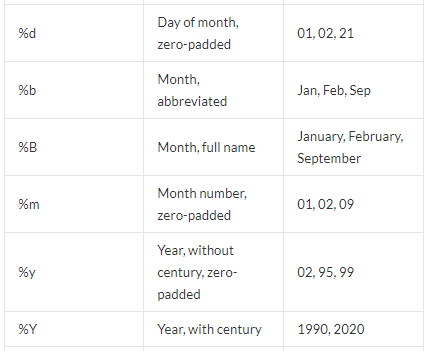

In [192]:
# cambio del formato de fecha
sales['date'] = pd.to_datetime(sales['date'], format="%y/%m/%d")

In [193]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store                 10774 non-null  int64         
 1   type                  10774 non-null  object        
 2   department            10774 non-null  int64         
 3   date                  10774 non-null  datetime64[ns]
 4   weekly_sales          10774 non-null  float64       
 5   is_holiday            10774 non-null  bool          
 6   temperature_c         10774 non-null  float64       
 7   fuel_price_usd_per_l  10774 non-null  float64       
 8   unemployment          10774 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 684.0+ KB
None


### Media y mediana

In [194]:
# media de las ventas semanales (promedio)
print(sales['weekly_sales'].mean())

23843.950148505668


In [195]:
# mediana
print(sales['weekly_sales'].median())

12049.064999999999


También se pueden aplicar a fechas (para los estadísticos que tengan sentido). 

In [196]:
# fecha máxima
print(sales['date'].max())

2012-10-26 00:00:00


In [197]:
# fecha mínima
print(sales['date'].min())

2010-02-05 00:00:00


### Metodo .agg()

Permite calcular estadísticos personalizados a través de funciones definidas por el usuario.

In [198]:
# Función personalizada para hallar rango intercuartil
# Q3 - Q1
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

print(sales["temperature_c"].agg(iqr))

16.583333337000003


se puede aplicar a varias columnas a la vez

In [199]:
# rango intercuartil para tres features
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


o aplicar más de una función por columna

In [200]:
# rango intercuartil y mediana de las tres variables
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


### Estadísticos acumulativos

`.cummax()`, `.cummin()`, `.cumprod()`

sales_1_1 es un nuevo dataFrame que contiene los datos de las ventas para el departamento 1, tienda 1.

In [201]:
sales_1_1 = sales[(sales['department'] == 1) & (sales['store'] == 1)]
sales_1_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [202]:
# Ordenar las filas por fecha en orden ascendente
sales_1_1 = sales_1_1.sort_values("date")

# Crear una nueva columna con la suma acumulativa
# de las ventas semanales
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Crear una nueva columna con el máximo acumulativo
# de las ventas semanales
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# Imprimir solo las columnas de fecha, ventas semanales
# y las dos columnas creadas
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

         date  weekly_sales  cum_weekly_sales  cum_max_sales
0  2010-02-05      24924.50          24924.50       24924.50
1  2010-03-05      21827.90          46752.40       24924.50
2  2010-04-02      57258.43         104010.83       57258.43
3  2010-05-07      17413.94         121424.77       57258.43
4  2010-06-04      17558.09         138982.86       57258.43
5  2010-07-02      16333.14         155316.00       57258.43
6  2010-08-06      17508.41         172824.41       57258.43
7  2010-09-03      16241.78         189066.19       57258.43
8  2010-10-01      20094.19         209160.38       57258.43
9  2010-11-05      34238.88         243399.26       57258.43
10 2010-12-03      22517.56         265916.82       57258.43
11 2011-01-07      15984.24         281901.06       57258.43


## Conteo
---

Útil para resumir datos categóricos

### Desechando duplicados

In [203]:
# Remueve las filas con pares duplicados store-type
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

      store type  department       date  weekly_sales  is_holiday  \
0         1    A           1 2010-02-05      24924.50       False   
901       2    A           1 2010-02-05      35034.06       False   
1798      4    A           1 2010-02-05      38724.42       False   
2699      6    A           1 2010-02-05      25619.00       False   
3593     10    B           1 2010-02-05      40212.84       False   

      temperature_c  fuel_price_usd_per_l  unemployment  
0          5.727778              0.679451         8.106  
901        4.550000              0.679451         8.324  
1798       6.533333              0.686319         8.623  
2699       4.683333              0.679451         7.259  
3593      12.411111              0.782478         9.765  


In [204]:
# Remueve las filas con pares duplicados store-department
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

    store type  department       date  weekly_sales  is_holiday  \
0       1    A           1 2010-02-05      24924.50       False   
12      1    A           2 2010-02-05      50605.27       False   
24      1    A           3 2010-02-05      13740.12       False   
36      1    A           4 2010-02-05      39954.04       False   
48      1    A           5 2010-02-05      32229.38       False   

    temperature_c  fuel_price_usd_per_l  unemployment  
0        5.727778              0.679451         8.106  
12       5.727778              0.679451         8.106  
24       5.727778              0.679451         8.106  
36       5.727778              0.679451         8.106  
48       5.727778              0.679451         8.106  


Tomar el subconjunto de las filas con semanas festivas y desechar las filas con fechas duplicadas.

In [205]:
holiday_dates = sales[sales["is_holiday"] == True].drop_duplicates(subset= "date")
print(holiday_dates["date"])

498    2010-09-10
691    2011-11-25
2315   2010-02-12
6735   2012-09-07
6810   2010-12-31
6815   2012-02-10
6820   2011-09-09
Name: date, dtype: datetime64[ns]


### Contando valores únicos

Las semanas festivas corresponden al Superbowl en febrero, el Día del Trabajo en septiembre, el Día de Acción de Gracias en noviembre y la Navidad en diciembre. Ahora que se eliminaron los duplicados, se puede hacer un recuento.

In [206]:
# Contar el número de tiendas de cada tipo en store_types
store_counts = store_types["type"].value_counts()
print(store_counts)

print('----------------------------------------------------------------------')

# Contar lo mismo en forma de proporción
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

print('----------------------------------------------------------------------')

# Contar el número de departamentos diferentes en store_depts
# ordenando el conteo de forma descendente
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

print('----------------------------------------------------------------------')

# Contar los departamentos en forma de proporción
# y ordenar de forma ascendente
dept_props_sorted = store_depts["department"].value_counts(normalize=True, sort=True, ascending=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
----------------------------------------------------------------------
A    0.916667
B    0.083333
Name: type, dtype: float64
----------------------------------------------------------------------
41    12
30    12
23    12
24    12
25    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
----------------------------------------------------------------------
43    0.002153
39    0.004306
50    0.006459
48    0.008611
37    0.010764
        ...   
25    0.012917
24    0.012917
23    0.012917
30    0.012917
41    0.012917
Name: department, Length: 80, dtype: float64


## Estadísticos de resumen agrupados
---

¿Qué porcentaje de ventas ocurren en cada tipo de tienda?

In [207]:
# Calcular las ventas totales semanales de todo el dataset
sales_all = sales["weekly_sales"].sum()

# Dividir por conjuntos según el tipo de tienda
# y calcular las ventas totales semanales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Calcular la proporción por cada tipo combinando los
# resultados anteriores en una lista y dividiendo entre `sales_all`
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


### Usando `.groupby()`

In [208]:
# Agrupar por tipo y calcular el total de ventas semanales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Calcular la proporción de cada tipo
sales_propn_by_type = sales_by_type / sum(sales["weekly_sales"])
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [209]:
# Agrupar por 'type' y 'is_holiday'; calcular ventas totales semanales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


### Múltiples resúmenes agrupados

In [210]:
# Para cada tipo de tienda, agregar el max, min, media y mediana
# de las ventas semanales
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])
print(sales_stats)

print('----------------------------------------------------------------------')

# Por cada tipo de tienda, agregar el max, min, media y mediana de 'unemployment'
# y 'fuel_price_usd_per_l'
unemp_fuel_stats = sales.groupby(["type"])["unemployment", "fuel_price_usd_per_l"].agg([np.min, np.max, np.mean, np.median])
print(unemp_fuel_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
----------------------------------------------------------------------
     unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


## Tablas pivote (tablas dinámicas)
---

Otra forma para realizar calculos agrupados. El metodo `.pivot_table()` es una alternativa a `.groupby()`.

### Tabla pivote con una variable

In [211]:
# Calcular la media de las ventas semanales por tipo de tienda
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [212]:
# lo mismo pero con la media y la mediana
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [213]:
# media de las ventas semanales por type y holiday
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


### Llenando valores faltantes y sumando valores con tablas dinámicas

El método `.pivot_table()` tiene varios argumentos útiles, como `fill_value` y `margins`.

* `fill_value` reemplaza los valores faltantes con un valor real (conocido como imputación).

* `margins` es un atajo para cuando se pivota por dos variables, pero también se quería pivotar por cada una de esas variables por separado (da los totales de fila y columna del contenido de la tabla dinámica).


In [214]:
# Imprimir la media de las ventas semanales por departamento y tipo
# llenar los valores faltantes con cero (0) y sumarizar todas
# las filas y columnas
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


## Índices explícitos
---

`temperatures` contiene la temperatura promedio en grados centígrados de varias ciudades del mundo por fecha.

In [215]:
temperatures = pd.read_csv('/content/sample_data/temperatures.csv')

### Configuración y eliminación de índices

In [216]:
print(temperatures.head())

print('----------------------------------------------------------------------')

# Indexar por ciudad
t_ind = temperatures.set_index("city")
print(t_ind.head())

print('----------------------------------------------------------------------')

# Reestablecer el indice, manteniendo su contenido
print(t_ind.reset_index())

print('----------------------------------------------------------------------')

# Reestablecer el indice, desechando su contenido
print(t_ind.reset_index(drop=True))

       date     city        country  avg_temp_c
0  00/01/01  Abidjan  Côte D'Ivoire      27.293
1  00/02/01  Abidjan  Côte D'Ivoire      27.685
2  00/03/01  Abidjan  Côte D'Ivoire      29.061
3  00/04/01  Abidjan  Côte D'Ivoire      28.162
4  00/05/01  Abidjan  Côte D'Ivoire      27.547
----------------------------------------------------------------------
             date        country  avg_temp_c
city                                        
Abidjan  00/01/01  Côte D'Ivoire      27.293
Abidjan  00/02/01  Côte D'Ivoire      27.685
Abidjan  00/03/01  Côte D'Ivoire      29.061
Abidjan  00/04/01  Côte D'Ivoire      28.162
Abidjan  00/05/01  Côte D'Ivoire      27.547
----------------------------------------------------------------------
          city      date        country  avg_temp_c
0      Abidjan  00/01/01  Côte D'Ivoire      27.293
1      Abidjan  00/02/01  Côte D'Ivoire      27.685
2      Abidjan  00/03/01  Côte D'Ivoire      29.061
3      Abidjan  00/04/01  Côte D'Ivoire      28

`.loc[ ]` es un método de filtrado que acepta valores de índices. Cuando se le pasa un único argumento, toma un subconjunto de filas.
Este método puede ser más fácil de leer que el método estándar.


In [217]:
# fijando las ciudades como indices
temperatures_ind = temperatures.set_index("city")

Cree una lista llamada `cities` que contenga a "Moscow" y "Saint Petersburg" como elementos. Use `[ ]` para filtrar el dataset `temperatures` por filas donde la columna `city` tenga un valor de la lista `cities`.
Use `.loc[ ]` para hacer lo mismo, pero en el dataset `temperatures_ind`, aprovechando que el índice son las ciudades (columna `city`).


In [218]:
# Crear lista de ciudades a filtrar
cities = ["Moscow", "Saint Petersburg"]

# Sacar subconjunto de `temperatures` usando corchetes
print(temperatures[temperatures["city"].isin(cities)])

print('----------------------------------------------------------------------')

# Sacar subconjunto de `temperatures_ind` usando `.loc[]`
# aprovechando que se fijó "city" como índice
print(temperatures_ind.loc[cities])

           date              city country  avg_temp_c
10725  00/01/01            Moscow  Russia      -7.313
10726  00/02/01            Moscow  Russia      -3.551
10727  00/03/01            Moscow  Russia      -1.661
10728  00/04/01            Moscow  Russia      10.096
10729  00/05/01            Moscow  Russia      10.357
...         ...               ...     ...         ...
13360  13/05/01  Saint Petersburg  Russia      12.355
13361  13/06/01  Saint Petersburg  Russia      17.185
13362  13/07/01  Saint Petersburg  Russia      17.234
13363  13/08/01  Saint Petersburg  Russia      17.153
13364  13/09/01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]
----------------------------------------------------------------------
                      date country  avg_temp_c
city                                          
Moscow            00/01/01  Russia      -7.313
Moscow            00/02/01  Russia      -3.551
Moscow            00/03/01  Russia      -1.661
Moscow            00/0

### Configuración de índices de varios niveles

También se puede indexar a partir de múltiples columnas, formando un índice multinivel (también llamado índice jerárquico).

El beneficio de este tipo de indexado es que hace que sea más natural pensar en variables categóricas anidadas. (Para el ejemplo de las temperaturas se puede decir que una ciudad esta anidada dentro de un país).

La principal desventaja es que el código para manipular índices es diferente del código para manipular columnas, complicando un poco las cosas.


In [219]:
# Indexar por país y ciudad
temperatures_ind = temperatures.set_index(["country", "city"])

# lista de tuplas a mantener: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"),("Pakistan", "Lahore")]

# Subconjunto de filas que se mantienen
print(temperatures_ind.loc[rows_to_keep])

                             date  avg_temp_c
country  city                                
Brazil   Rio De Janeiro  00/01/01      25.974
         Rio De Janeiro  00/02/01      26.699
         Rio De Janeiro  00/03/01      26.270
         Rio De Janeiro  00/04/01      25.750
         Rio De Janeiro  00/05/01      24.356
...                           ...         ...
Pakistan Lahore          13/05/01      33.457
         Lahore          13/06/01      34.456
         Lahore          13/07/01      33.279
         Lahore          13/08/01      31.511
         Lahore          13/09/01         NaN

[330 rows x 2 columns]


### Ordenar por valores de índice

Antes se vió como cambiar el orden de las filas en un DataFrame usando `.sort_values()`. También es de utilidad poder ordenar por elementos en el índice. Para esto, se usa `.sort_index()`.

In [220]:
# Ordenar por valor del índice
print(temperatures_ind.sort_index())

print('----------------------------------------------------------------------')

# Ordenar por valor del índice a nivel de ciudad
print(temperatures_ind.sort_index(level="city"))

print('----------------------------------------------------------------------')

# Ordenar por país y luego por ciudad descendente
print(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

                        date  avg_temp_c
country     city                        
Afghanistan Kabul   00/01/01       3.326
            Kabul   00/02/01       3.454
            Kabul   00/03/01       9.612
            Kabul   00/04/01      17.925
            Kabul   00/05/01      24.658
...                      ...         ...
Zimbabwe    Harare  13/05/01      18.298
            Harare  13/06/01      17.020
            Harare  13/07/01      16.299
            Harare  13/08/01      19.232
            Harare  13/09/01         NaN

[16500 rows x 2 columns]
----------------------------------------------------------------------
                           date  avg_temp_c
country       city                         
Côte D'Ivoire Abidjan  00/01/01      27.293
              Abidjan  00/02/01      27.685
              Abidjan  00/03/01      29.061
              Abidjan  00/04/01      28.162
              Abidjan  00/05/01      27.547
...                         ...         ...
China         Xian

## Filtrando con `.loc` y `.iloc`
---

Con estos métodos se pueden tomar porciones definidas del conjunto de datos.

### Por valor de índice

In [221]:
# Rebanando por índices
temperatures_srt = temperatures_ind.sort_index()

# Subconjunto de filas entre Pakistan y Russia
print(temperatures_srt.loc["Pakistan" : "Russia"])

print('----------------------------------------------------------------------')

# Subconjunto de filas desde Pakistan, Lahore hasta Rusia, Moscu
print(temperatures_srt.loc[("Pakistan", "Lahore") : ("Russia", "Moscow")])

                               date  avg_temp_c
country  city                                  
Pakistan Faisalabad        00/01/01      12.792
         Faisalabad        00/02/01      14.339
         Faisalabad        00/03/01      20.309
         Faisalabad        00/04/01      29.072
         Faisalabad        00/05/01      34.845
...                             ...         ...
Russia   Saint Petersburg  13/05/01      12.355
         Saint Petersburg  13/06/01      17.185
         Saint Petersburg  13/07/01      17.234
         Saint Petersburg  13/08/01      17.153
         Saint Petersburg  13/09/01         NaN

[1155 rows x 2 columns]
----------------------------------------------------------------------
                     date  avg_temp_c
country  city                        
Pakistan Lahore  00/01/01      12.792
         Lahore  00/02/01      14.339
         Lahore  00/03/01      20.309
         Lahore  00/04/01      29.072
         Lahore  00/05/01      34.845
...           

### Por filas y columnas simultaneamente

In [222]:
# Rebanando en ambas direcciones
# Subconjunto de filas desde India, Hyderabad hasta Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad") : ("Iraq", "Baghdad")])

print('----------------------------------------------------------------------')

# Subconjunto columnas desde date hasta avg_temp_c
print(temperatures_srt.loc[:, "date" : "avg_temp_c"])

print('----------------------------------------------------------------------')

# Rebanando al mismo tiempo filas y columnas
print(temperatures_srt.loc[("India", "Hyderabad") : ("Iraq", "Baghdad"), "date" : "avg_temp_c"])

                       date  avg_temp_c
country city                           
India   Hyderabad  00/01/01      23.779
        Hyderabad  00/02/01      25.826
        Hyderabad  00/03/01      28.821
        Hyderabad  00/04/01      32.698
        Hyderabad  00/05/01      32.438
...                     ...         ...
Iraq    Baghdad    13/05/01      28.673
        Baghdad    13/06/01      33.803
        Baghdad    13/07/01      36.392
        Baghdad    13/08/01      35.463
        Baghdad    13/09/01         NaN

[2145 rows x 2 columns]
----------------------------------------------------------------------
                        date  avg_temp_c
country     city                        
Afghanistan Kabul   00/01/01       3.326
            Kabul   00/02/01       3.454
            Kabul   00/03/01       9.612
            Kabul   00/04/01      17.925
            Kabul   00/05/01      24.658
...                      ...         ...
Zimbabwe    Harare  13/05/01      18.298
            Har

### Rebanando series de tiempo

In [223]:
temperatures.head()

,date,city,country,avg_temp_c
0,00/01/01,Abidjan,Côte D'Ivoire,27.293
1,00/02/01,Abidjan,Côte D'Ivoire,27.685
2,00/03/01,Abidjan,Côte D'Ivoire,29.061
3,00/04/01,Abidjan,Côte D'Ivoire,28.162
4,00/05/01,Abidjan,Côte D'Ivoire,27.547


llevar las fechas a formato ISO 8601 (yyyy-mm-dd)

In [224]:
temperatures['date'] = pd.to_datetime(temperatures['date'], format="%y/%m/%d")
print(temperatures.head())

        date     city        country  avg_temp_c
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [225]:
# Utilice condiciones booleanas para crear subconjuntos de temperaturas
# para filas en 2010 y 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

print('----------------------------------------------------------------------')

# Fije la fecha como índice y ordénelo
temperatures_ind = temperatures.set_index("date").sort_index()

# Mismo filtro usando .loc[]
print(temperatures_ind.loc["2010":"2011"])

print('----------------------------------------------------------------------')

# Filtrando por fechas parciales
print(temperatures_ind.loc["2010-08":"2011-02"])

            date     city        country  avg_temp_c
120   2010-01-01  Abidjan  Côte D'Ivoire      28.270
121   2010-02-01  Abidjan  Côte D'Ivoire      29.262
122   2010-03-01  Abidjan  Côte D'Ivoire      29.596
123   2010-04-01  Abidjan  Côte D'Ivoire      29.068
124   2010-05-01  Abidjan  Côte D'Ivoire      28.258
...          ...      ...            ...         ...
16474 2011-08-01     Xian          China      23.069
16475 2011-09-01     Xian          China      16.775
16476 2011-10-01     Xian          China      12.587
16477 2011-11-01     Xian          China       7.543
16478 2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]
----------------------------------------------------------------------
                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil     

### Filtrando por número de fila/columna

Esto se hace utilizando `.iloc[]`, y al igual que `.loc[]`, puede recibir dos argumentos para permitirle hacer un subconjuntos por filas y columnas.

In [226]:
# Fila 23, columna 2 (índice 22,1)
print(temperatures.iloc[22, 1])

print('----------------------------------------------------------------------')

# Tome las primeras 5 filas
print(temperatures.iloc[:5, :])

print('----------------------------------------------------------------------')

# Tome las columnas de la 3 a la 4
print(temperatures.iloc[:, 2:4])

print('----------------------------------------------------------------------')

# Rebanar en las dos direcciones de forma simultanea
print(temperatures.iloc[:5, 2:4])

Abidjan
----------------------------------------------------------------------
        date     city        country  avg_temp_c
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547
----------------------------------------------------------------------
             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]
----------------------------------------------------------------------
         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Cô

## Visualización de DataFrames
---

El dataset `avocados` registra las ventas en el transcurso de algunos años de dos tipos de aguacate.

In [234]:
avocados = pd.read_pickle('/content/sample_data/avoplotto.pkl')

In [235]:
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


In [236]:
print(avocados.tail())

            date     type  year  avg_price         size  nb_sold
1009  2018-02-04  organic  2018       1.53  extra_large  1703.52
1010  2018-01-28  organic  2018       1.61  extra_large  1270.61
1011  2018-01-21  organic  2018       1.63  extra_large  1490.02
1012  2018-01-14  organic  2018       1.59  extra_large  1580.01
1013  2018-01-07  organic  2018       1.51  extra_large  1289.07


### Visualizando los datos

¿Qué tamaño de aguacate es el más popular?

Los gráficos de barras son excelentes para revelar las relaciones entre las variables categóricas y numéricas, pero es necesario manipular primero los datos para obtener los números necesarios para el trazado de los gráficos.

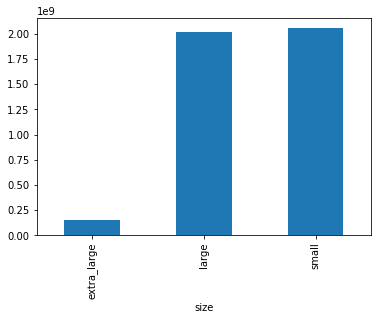

In [242]:
# número total de aguacates vendidos de cada tamaño
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# crear un gráfico de barras del número de aguacates vendidos por tamaño
nb_sold_by_size.plot(kind='bar')

# mostrar el gráfico
plt.show()

Cambios en las ventas a lo largo del tiempo

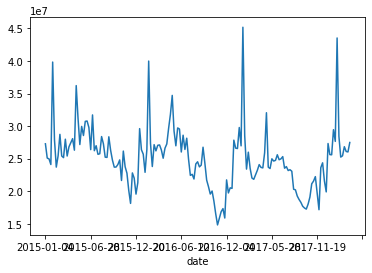

In [243]:
# Obtener el número total de aguacates vendidos en cada fecha
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Crear un gráfico de línea del número de aguacates vendidos por fecha
nb_sold_by_date.plot(kind='line',)

# Mostrar el gráfico
plt.show()

Oferta y demanda de aguacates

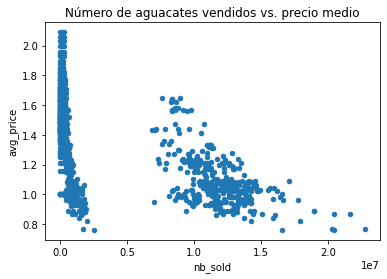

In [244]:
# Diagrama de dispersión de nb_sold vs avg_price con título
avocados.plot(x='nb_sold', y='avg_price', kind='scatter',
              title="Número de aguacates vendidos vs. precio medio")
plt.show()

Precio de los aguacates convencionales frente a los organicos

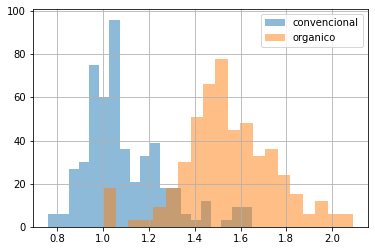

In [245]:
# Histograma del precio promedio del aguacate convencional 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(bins=20, alpha=0.5)

# Histograma del precio promedio del aguacate organico
avocados[avocados["type"] == "organic"]["avg_price"].hist(bins=20, alpha=0.5)

# Añadir una leyenda
plt.legend(["convencional", "organico"])

plt.show()